# Lab Two: Exploring Image Data

# Business Case

   The Covid-19 Image Dataset comprises chest X-rays, categorized into Covid chest X-rays and Viral pneumonia chest X-rays. It was originally compiled for various critical purposes and concerns during the COVID-19 pandemic.

   The primary aim of this dataset is to assist in detecting and diagnosing COVID-19 cases using chest X-rays. Medical professionals and radiologists can utilize this dataset to train and validate machine learning models capable of automatically identifying patterns and anomalies associated with COVID-19 in X-ray images. Medical researchers and epidemiologists can also utilize this dataset for a range of studies and analyses related to COVID-19. These studies may involve assessing disease prevalence and severity based on X-ray images, identifying potential risk factors, and studying disease progression. Clinicians and healthcare providers can benefit from predictive models trained on this dataset to aid in treatment planning. Accurate detection of COVID-19 cases through X-ray images can enhance resource allocation within healthcare systems and enable prompt patient care. Public health authorities and policymakers can leverage insights derived from this dataset to make informed decisions regarding public health interventions and strategies for controlling COVID-19 spread.

   The prediction task associated with this dataset involves distinguishing between Normal Chest X-Rays and X-rays indicating either COVID-19 or Viral pneumonia. The criteria for successful performance of prediction algorithms would vary depending on specific use cases and user requirements. However, a valuable algorithm typically needs to achieve a high level of accuracy, sensitivity, and specificity. The precise threshold for what constitutes "valuable" would be contingent on the specific objectives of the dataset users. In medical diagnostics, algorithms are generally expected to achieve accuracy levels exceeding 95% or even higher to be considered clinically beneficial.

# Data Preparation

## Reading in Image Data

In [20]:
from PIL import Image
import numpy as np
import os
import time
import cv2
import pickle
import matplotlib.pyplot as plt
import multiprocessing
import random
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from skimage import io, color
from skimage.filters import gabor

dataset_path = "Covid19-dataset/train"

def loadImages(folder_path, size=(150, 150), num_channels=3):
    image_files = os.listdir(folder_path)
    images = []
    for image_name in image_files:
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)
        img = img.convert('RGB')
        img = img.resize(size)
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)

covid_images = loadImages(os.path.join(dataset_path, "Covid"))
viral_pneumonia_images = loadImages(os.path.join(dataset_path, "Viral Pneumonia"))

## Visualize Data

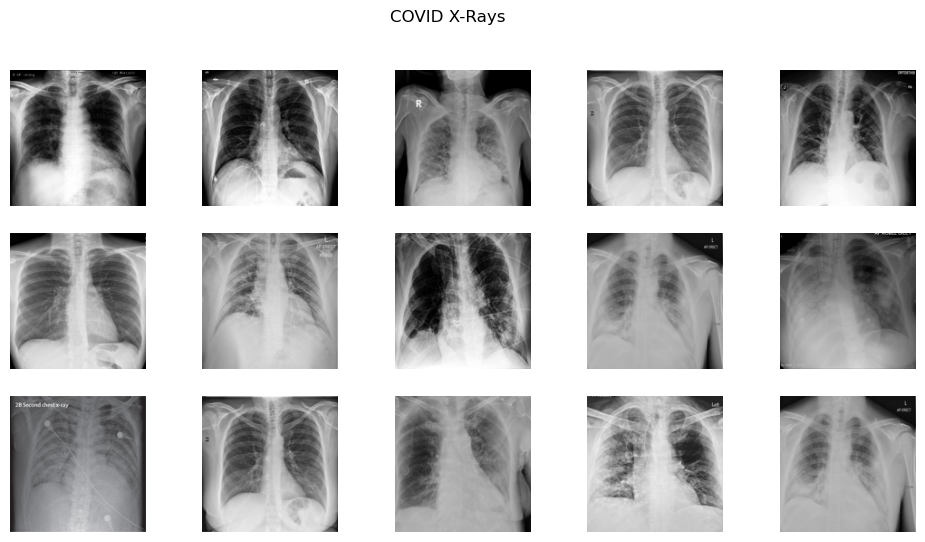

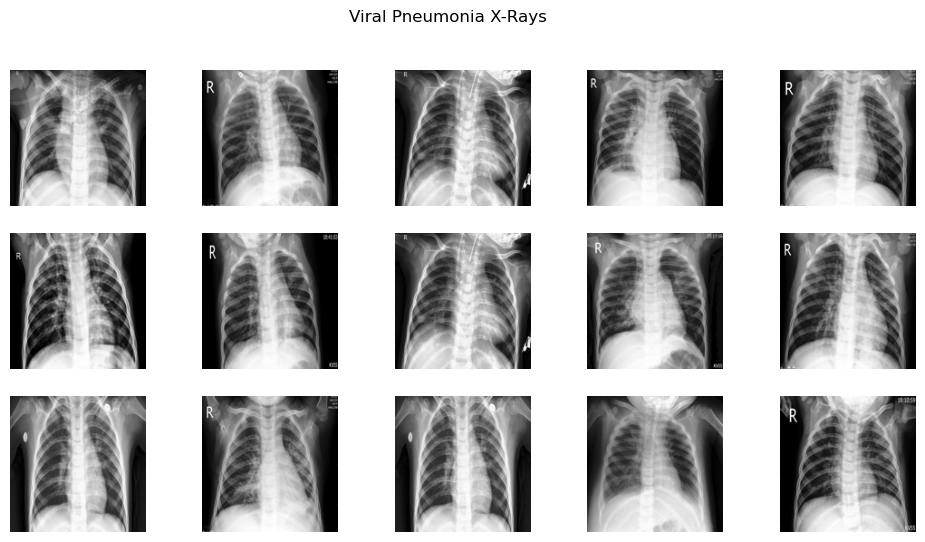

In [21]:
plt.figure(figsize=(12, 6))
plt.suptitle("COVID X-Rays")
for i in range(15):
    plt.subplot(3, 5, i + 1)
    random_index = np.random.randint(len(covid_images))
    plt.imshow(covid_images[random_index])
    plt.axis('off')

plt.figure(figsize=(12, 6))
plt.suptitle("Viral Pneumonia X-Rays")
for i in range(15):
    plt.subplot(3, 5, i + 1)
    random_index = np.random.randint(len(viral_pneumonia_images))
    plt.imshow(viral_pneumonia_images[random_index])
    plt.axis('off')
plt.show()

## 1D Linearization

Covid						Viral Pneumonia


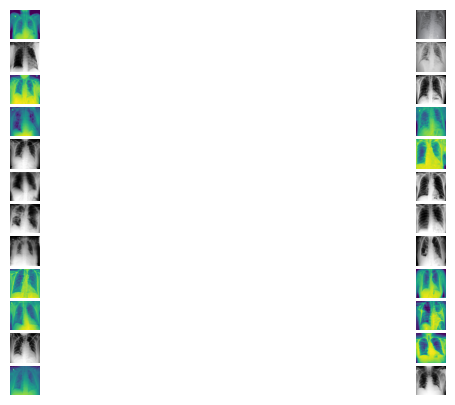

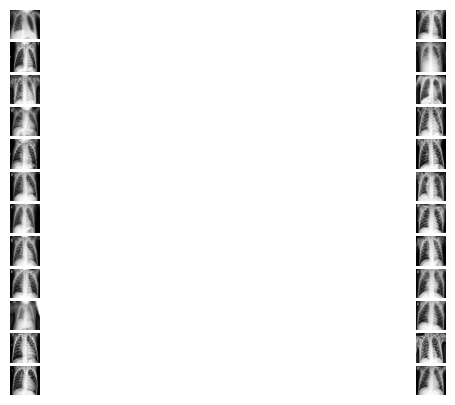

In [22]:
def display(folder_path, num_images=15, size=(100, 100), columns=2):
    image_files = os.listdir(folder_path)
    random_images = random.sample(image_files, num_images)
    images_table = []
    
    for i, image_name in enumerate(random_images):
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)
        img = img.resize(size)
        if img.mode == 'RGBA':
            img = img.convert('RGB')
        
        images_table.append(np.array(img))
    
    num_rows = num_images // columns
    fig, axes = plt.subplots(num_rows, columns, figsize=(10, 5))
    
    for i in range(num_rows):
        for j in range(columns):
            index = i * columns + j
            if index < num_images:
                axes[i, j].imshow(images_table[index])
                axes[i, j].axis('off')  
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

folders = ["Covid", "Viral Pneumonia"]
print("Covid\t\t\t\t\t\tViral Pneumonia")
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    display(folder_path, num_images=25, columns=2)

## Visualize Several Images

Covid:


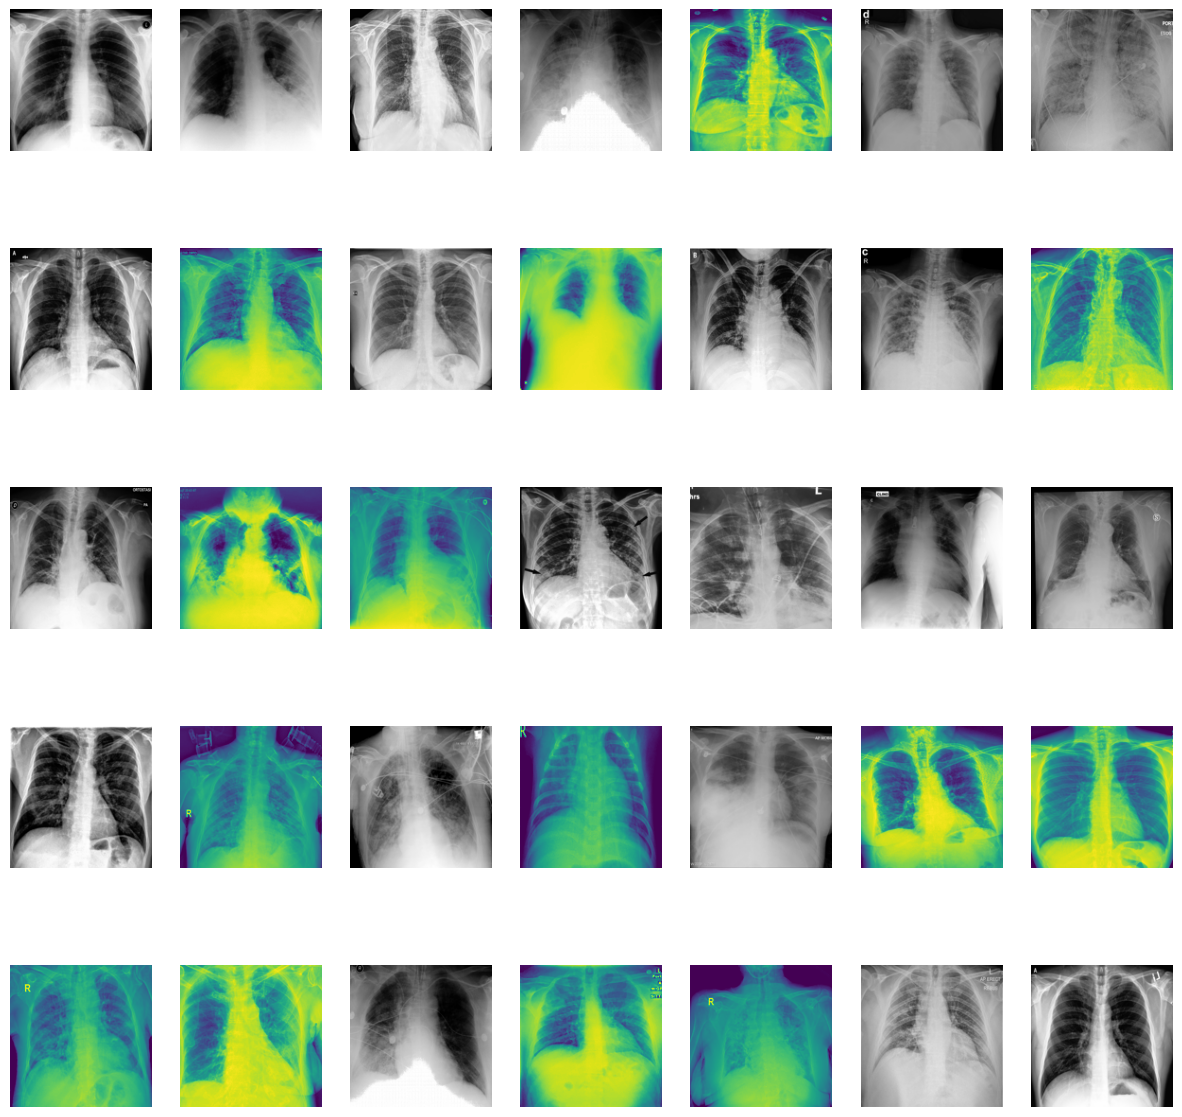

Viral Pneumonia:


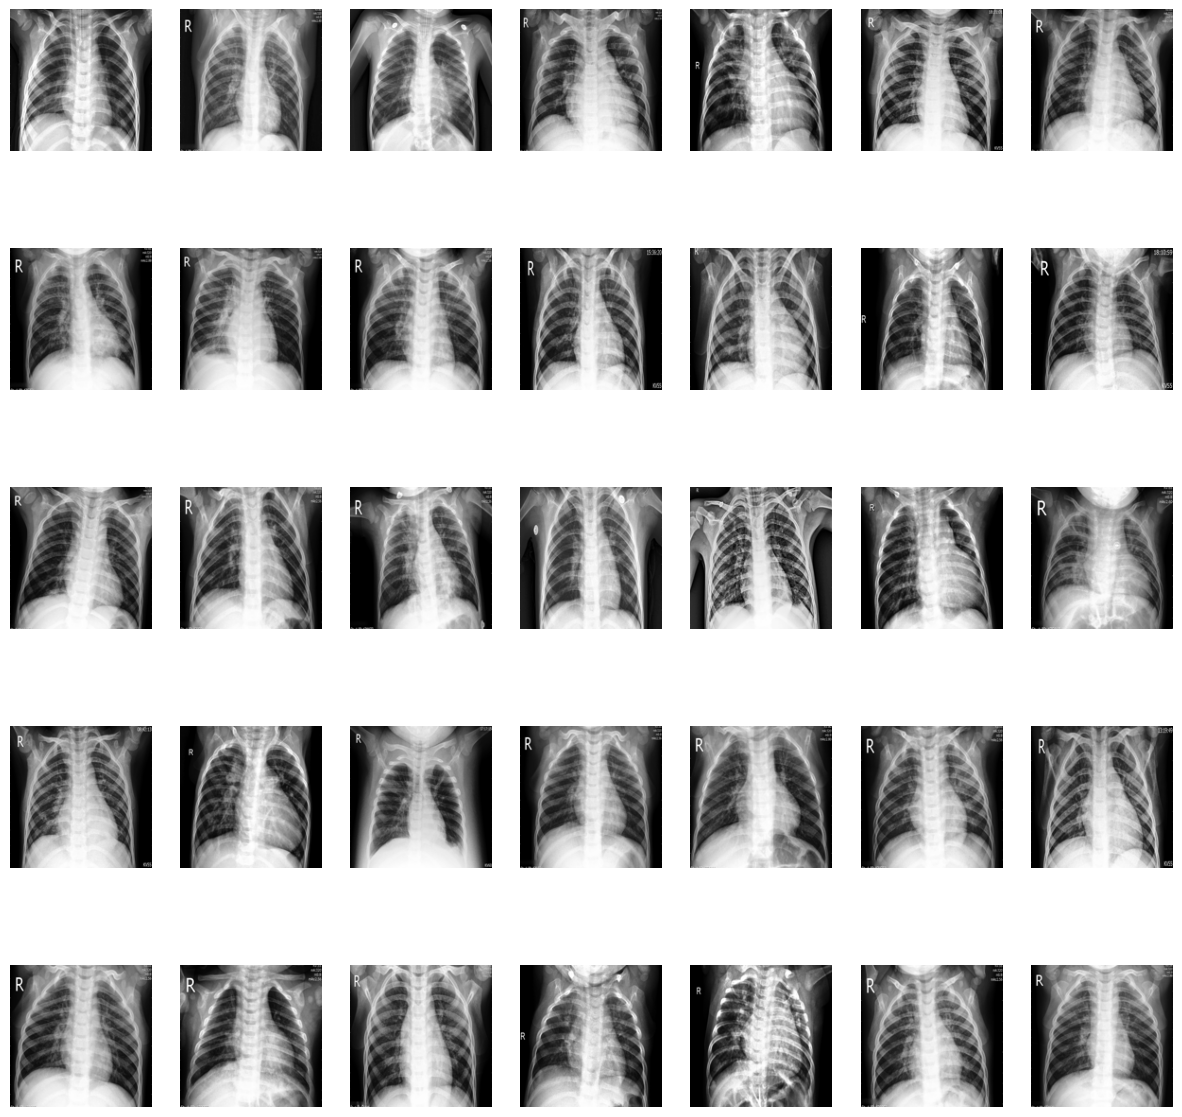

In [23]:
dataset_path = "Covid19-dataset/train"
def displaySeveral(folder_path, num_images=65, size=(150, 150), images_per_row=7):
    image_files = os.listdir(folder_path)  
    random_images = random.sample(image_files, num_images)
    rows = (num_images // images_per_row) + (num_images % images_per_row > 0)   
    fig, axes = plt.subplots(rows, images_per_row, figsize=(15, 15))   
    for i, image_name in enumerate(random_images):
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)
        img = img.resize(size)  
        ax = axes[i // images_per_row, i % images_per_row]
        ax.imshow(img)
        ax.axis('off')  
    for i in range(num_images, rows * images_per_row):
        fig.delaxes(axes.flatten()[i]) 
    plt.show()

folders = ["Covid", "Viral Pneumonia"]
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    print(f"{folder}:")
    displaySeveral(folder_path, num_images=35, images_per_row=7)

# Data Reduction

## PCA

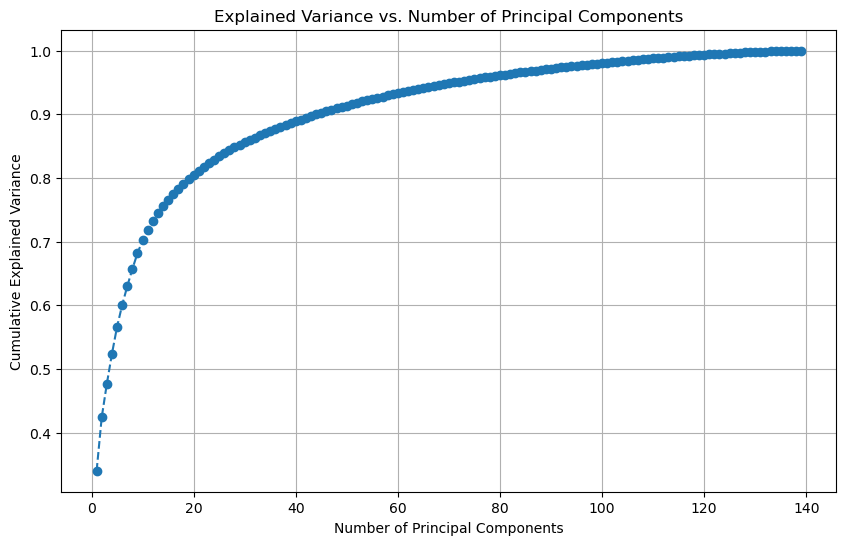

Cumulative explained variance: 71


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

dataset_path = "Covid19-dataset/train"
def load_images(folder_path, size=(150, 150)):
    image_files = os.listdir(folder_path)
    images = []
    for image_name in image_files:
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)
        img = img.resize(size) 
        img_array = np.array(img)
        if img_array.shape == size + (3,):  
            images.append(img_array.flatten())  
    return np.array(images)

covid_images = load_images(os.path.join(dataset_path, "Covid"))
viral_pneumonia_images = load_images(os.path.join(dataset_path, "Viral Pneumonia"))
image_data = np.vstack((covid_images, viral_pneumonia_images))

pca = PCA()
pca.fit(image_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Principal Components")
plt.grid(True)
plt.show()

desired_variance = 0.95
num_components_required = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Cumulative explained variance: {num_components_required}")

The cumulative explained variance begins to slow in increase around 71 components. 71 dimensions are adequate to represent the data. This seems to cover 95% in explained variance and even to 100% would require around 120 components based on the explained variance plots.

## Randomized PCA

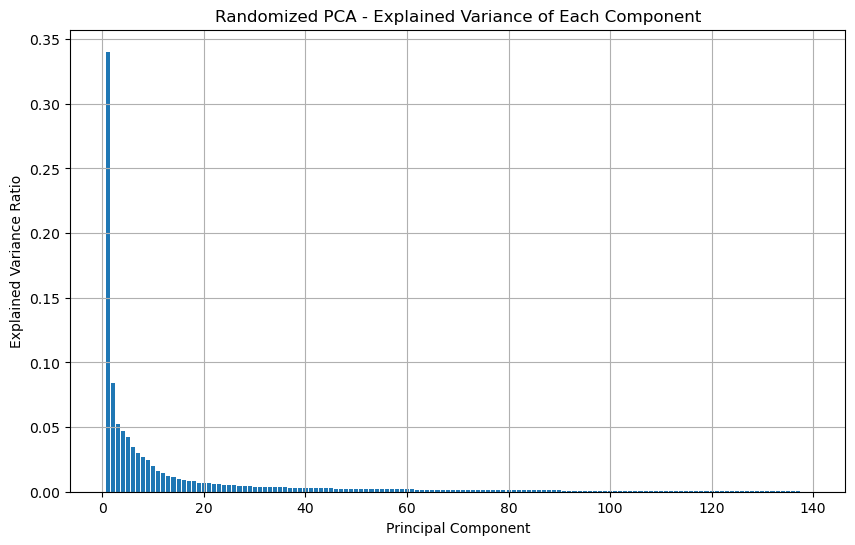

Cumulative explained variance (Randomized PCA): 71


In [25]:
randomized_pca = PCA(svd_solver='randomized')
randomized_pca.fit(image_data)

explained_variance_ratio_randomized = randomized_pca.explained_variance_ratio_
cumulative_variance_randomized = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio_randomized) + 1), explained_variance_ratio_randomized)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Randomized PCA - Explained Variance of Each Component")
plt.grid(True)
plt.show()

desired_variance = 0.95
num_components_required_randomized = np.argmax(cumulative_variance_randomized >= desired_variance) + 1

print(f"Cumulative explained variance (Randomized PCA): {num_components_required_randomized}")


The cumulative explained variance shows a slowing in increase at around 71 components, which is similar to the behavior of the full PCA method, with only minor differences. What's interesting about this observation is the minimal distinction between the randomized solver and the full solver, even though the computation time is significantly different. Rhe orthogonal matrix used by the randomized solver efficiently identifies a low-rank approximation that captures the important information in the original covariance matrix. This highlights the efficiency of the randomized approach.

## Quantitative Analysis of PCA vs Random PCA

PCA:
Dimensions required: 71
Cumulative explained variance: 0.9502805461114222

Randomized PCA:
Dimensions required: 71
Cumulative explained variance: 0.9502805461114232


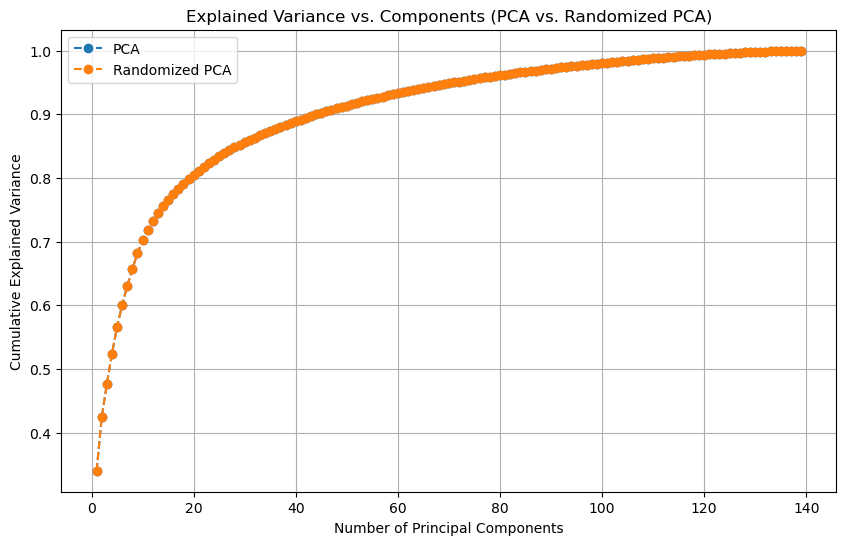

In [35]:
desired_variance = 0.95

# Perform PCA
pca = PCA()
pca.fit(image_data)
cumulative_variance_pca = np.cumsum(pca.explained_variance_ratio_)
num_components_required_pca = np.argmax(cumulative_variance_pca >= desired_variance) + 1

# Perform Randomized PCA
randomized_pca = PCA(svd_solver='randomized')
randomized_pca.fit(image_data)
cumulative_variance_randomized_pca = np.cumsum(randomized_pca.explained_variance_ratio_)
num_components_required_randomized_pca = np.argmax(cumulative_variance_randomized_pca >= desired_variance) + 1

# Compare
print("PCA:")
print(f"Dimensions required: {num_components_required_pca}")
print(f"Cumulative explained variance: {cumulative_variance_pca[num_components_required_pca - 1]}")
print("\nRandomized PCA:")
print(f"Dimensions required: {num_components_required_randomized_pca}")
print(f"Cumulative explained variance: {cumulative_variance_randomized_pca[num_components_required_randomized_pca - 1]}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_pca) + 1), cumulative_variance_pca, label='PCA', marker='o', linestyle='--')
plt.plot(range(1, len(cumulative_variance_randomized_pca) + 1), cumulative_variance_randomized_pca, label='Randomized PCA', marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Components (PCA vs. Randomized PCA)")
plt.legend()
plt.grid(True)
plt.show()

Based on the visualization above, Randomized PCA and PCA are exactly the same for full dataset in terms of the classification accuracy.

## Gabor Feature Extraction

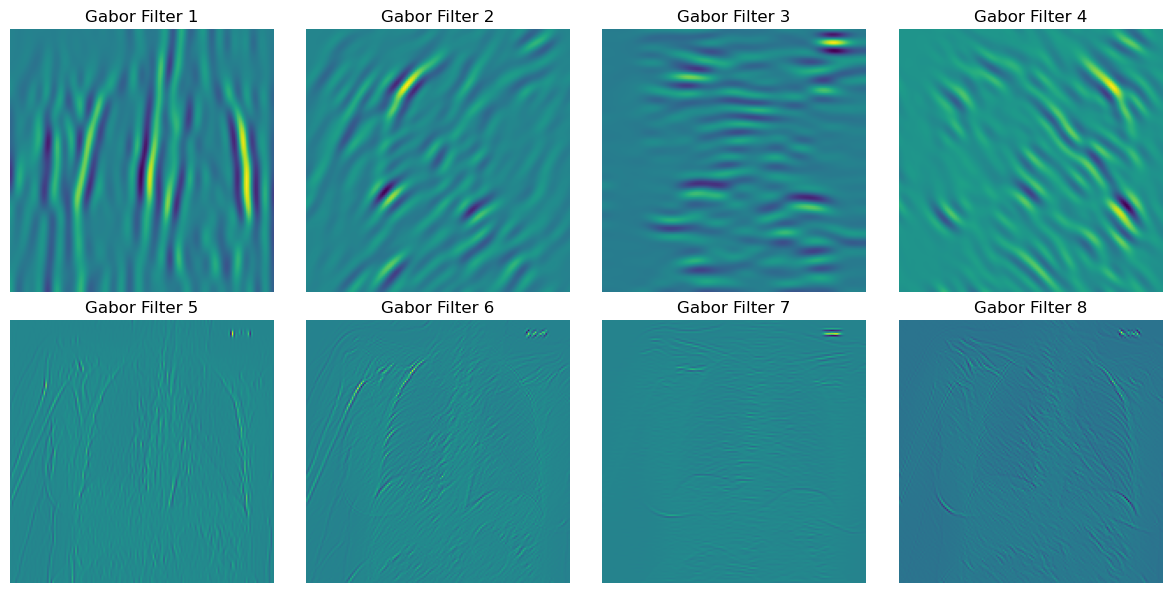

In [28]:
dataset_path = "Covid19-dataset/train"
def load(folder_path, size=(150, 150)):
    image_files = os.listdir(folder_path)
    images = []
    for image_name in image_files:
        image_path = os.path.join(folder_path, image_name)
        img = Image.open(image_path)
        img = img.resize(size) 
        img_array = np.array(img)
        if img_array.shape == size + (3,):
            images.append(img_array)   
    return np.array(images)

covid_images = load(os.path.join(dataset_path, "Covid"))
viral_pneumonia_images = load(os.path.join(dataset_path, "Viral Pneumonia"))
image_data = np.vstack((covid_images, viral_pneumonia_images))

def extract_gabor_features(image):
    gray_image = color.rgb2gray(image)
    frequencies = [0.1, 0.5, 1.0]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    features = []
    for freq in frequencies:
        for angle in angles:
            filtered_image, _ = gabor(gray_image, frequency=freq, theta=angle)
            features.append(filtered_image.flatten())
    return np.array(features)

gabor_features = [extract_gabor_features(image) for image in image_data]
gabor_features = np.vstack(gabor_features)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(gabor_features[i].reshape(150, 150), cmap='viridis')
    plt.title(f'Gabor Filter {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


The Gabor texture feature extraction is valuable for my prediction task after visualizing the stats of extracted features in each class. This extractions can show differentiation between the Covid and Viral Pneumonia classes.

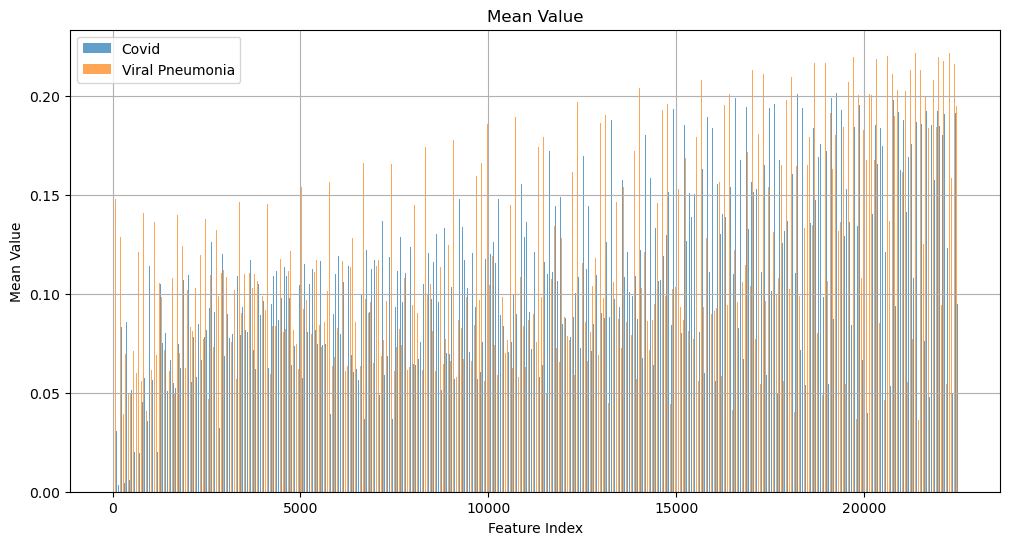

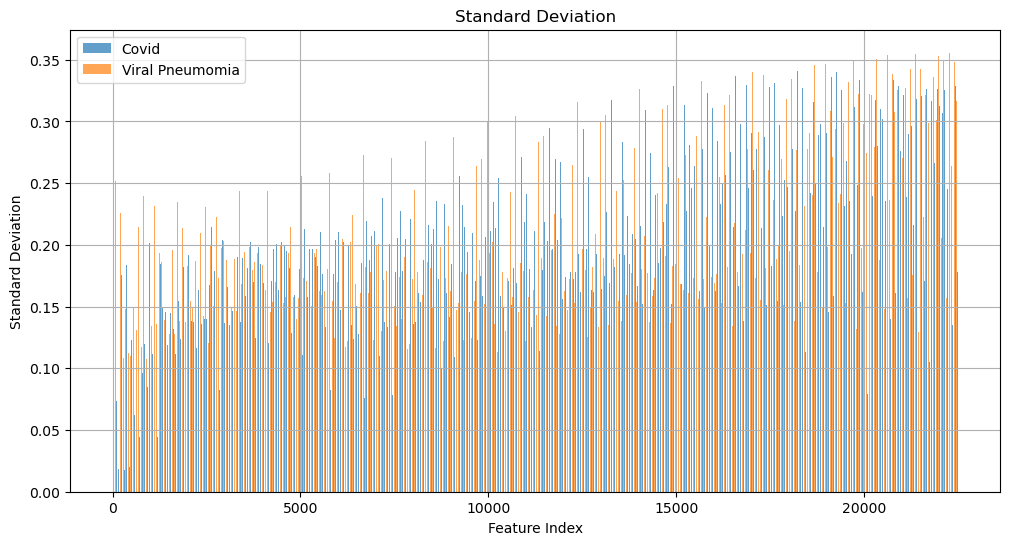

In [31]:
covid_mean = np.mean(gabor_features[:len(covid_images)], axis=0)
covid_std = np.std(gabor_features[:len(covid_images)], axis=0)
viral_pneumonia_mean = np.mean(gabor_features[len(covid_images):], axis=0)
viral_pneumonia_std = np.std(gabor_features[len(covid_images):], axis=0)

feature_indices = np.arange(gabor_features.shape[1])
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(feature_indices, covid_mean, bar_width, label='Covid', alpha=0.7)
plt.bar(feature_indices + bar_width, viral_pneumonia_mean, bar_width, label='Viral Pneumonia', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(feature_indices, covid_std, bar_width, label='Covid', alpha=0.7)
plt.bar(feature_indices + bar_width, viral_pneumonia_std, bar_width, label='Viral Pneumomia', alpha=0.7)
plt.xlabel('Feature Index')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


In these visual representations, we are conducting a comparative analysis of the Gabor texture features concerning the "Covid" and "Viral Pneumonia" categories. On the x-axis, you can see each feature, while the y-axis depicts either the mean value or the standard deviation. The two categories are indicated by distinct colors. It's important to note that while the mean and standard deviation values aren't drastically different, they are not identical. This suggests that these features may have potential in distinguishing between cases of "Covid" and "Viral Pneumonia."